<a href="https://colab.research.google.com/github/babupallam/Supervised-Learning-Regression-Algorithms/blob/main/03_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ridge Regression

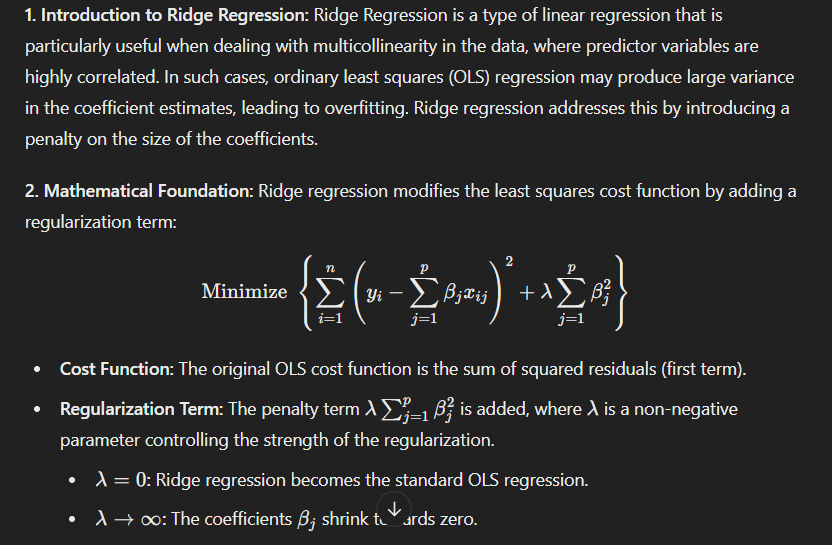


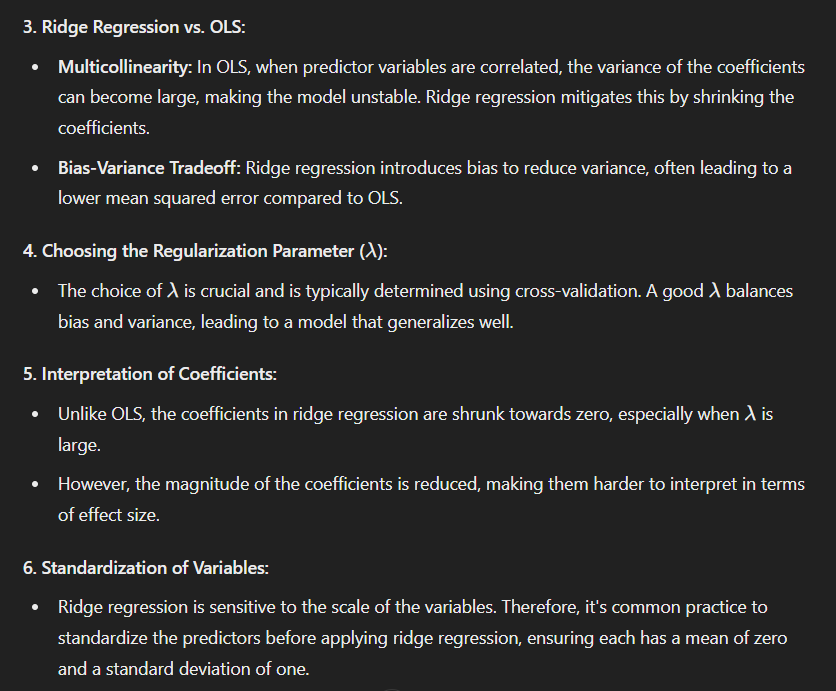


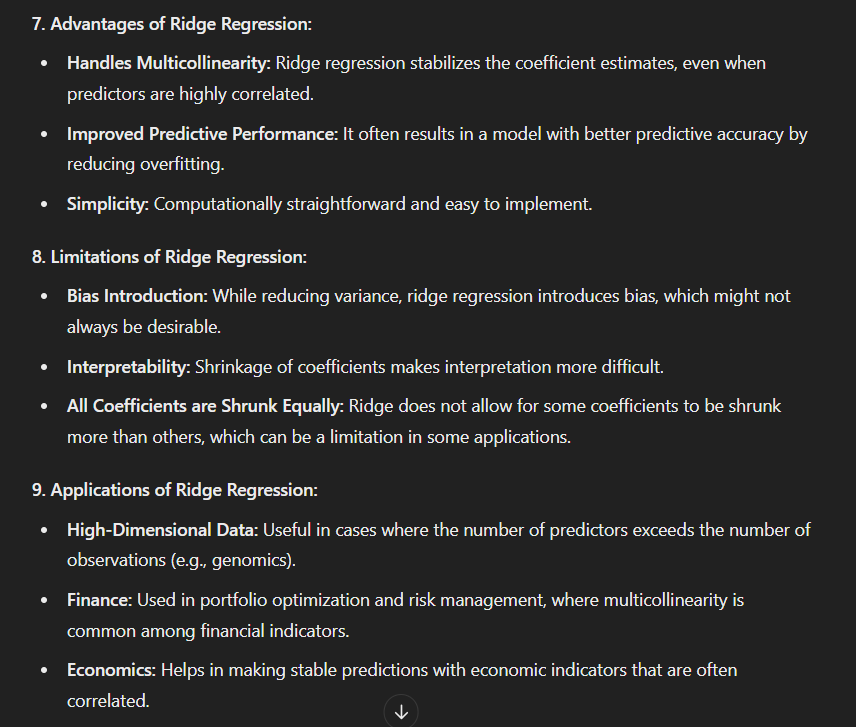



# Demo of the Model


In [1]:
# import libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# load and create database

from sklearn.datasets import make_regression

# Create a synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Initialize Ridge regression model with alpha (λ) parameter
ridge_reg = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 4.114050771972589
R^2 Score: 0.9997951390892165


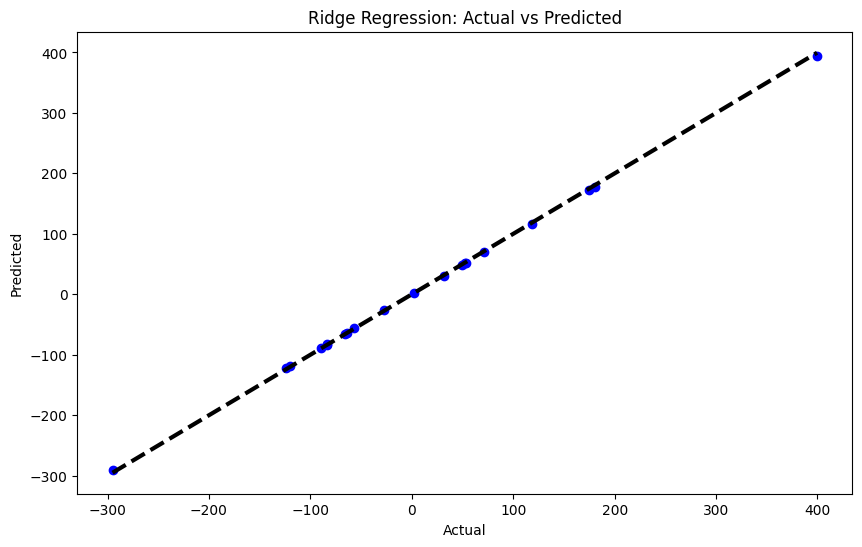

In [4]:
# Plotting the true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()


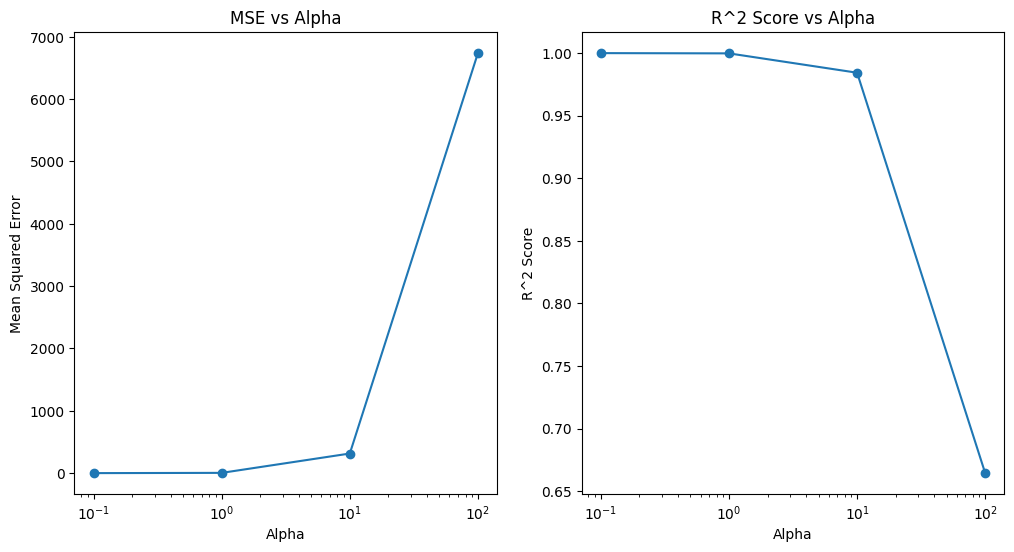

In [5]:
# Experiment with Different Alpha Values

alphas = [0.1, 1.0, 10.0, 100.0]
mse_values = []
r2_values = []

for alpha in alphas:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    y_pred = ridge_reg.predict(X_test)

    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

# Plotting the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(alphas, mse_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Alpha')

plt.subplot(1, 2, 2)
plt.plot(alphas, r2_values, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Alpha')

plt.show()


# Applications of the model


### 1. **Finance and Economics**
   - **Portfolio Optimization:** In finance, Ridge Regression is used to estimate the weights of assets in a portfolio when the returns of these assets are highly correlated. By penalizing large coefficients, it helps in creating a more stable and diversified portfolio.
   - **Economic Forecasting:** Ridge Regression is useful in econometrics for predicting economic indicators (e.g., GDP growth, inflation rates) where predictor variables are often highly correlated.
   - **Credit Scoring:** It helps in developing credit scoring models by dealing with multicollinearity among predictors like income, debt levels, and credit history.

### 2. **Healthcare and Bioinformatics**
   - **Genomic Data Analysis:** In bioinformatics, Ridge Regression is used for analyzing large-scale genomic data where the number of predictors (genes) often exceeds the number of observations. It helps in identifying genes associated with diseases while controlling for multicollinearity.
   - **Predictive Modeling in Healthcare:** Ridge Regression is applied in predictive models for patient outcomes, such as predicting the risk of disease or the effectiveness of treatments, where the data often involves many correlated variables (e.g., biomarkers, medical history).

### 3. **Marketing and Customer Analytics**
   - **Customer Lifetime Value Prediction:** Marketers use Ridge Regression to predict customer lifetime value (CLV) by analyzing various correlated factors like purchase history, customer demographics, and engagement metrics.
   - **Demand Forecasting:** Ridge Regression helps in forecasting product demand by dealing with correlated variables such as pricing, marketing spend, and seasonal effects.
   - **Market Basket Analysis:** In retail, it can be used to understand the relationships between different products purchased together and to predict future purchase behaviors.

### 4. **Engineering and Environmental Sciences**
   - **Signal Processing:** In fields like telecommunications and audio processing, Ridge Regression is used to predict signals in the presence of noise, where input features may be highly correlated.
   - **Environmental Modeling:** Ridge Regression is employed in environmental sciences to model and predict environmental factors (e.g., pollution levels, temperature) where predictors (like various pollutants or climate indicators) are correlated.
   - **Energy Consumption Prediction:** It is used to model and forecast energy consumption in buildings or industries by analyzing correlated factors such as temperature, occupancy, and equipment usage.

### 5. **Social Sciences**
   - **Sociological Studies:** In social sciences, Ridge Regression helps in modeling complex relationships between variables like income, education level, and social behavior, where multicollinearity is common.
   - **Psychometric Analysis:** It's used in psychology to predict outcomes like cognitive scores or personality traits from a set of correlated predictors such as test scores or survey responses.

### 6. **Technology and Machine Learning**
   - **Natural Language Processing (NLP):** Ridge Regression is applied in NLP tasks like sentiment analysis and text classification, especially when dealing with a large number of features (e.g., word vectors) that are often correlated.
   - **Image Recognition:** In computer vision, Ridge Regression can be used for tasks like object detection and recognition when dealing with high-dimensional feature spaces where pixel intensities or feature maps are correlated.
   - **Feature Selection:** It serves as a technique for feature selection by penalizing less important features, thus improving model interpretability and reducing overfitting.

### 7. **Transportation and Logistics**
   - **Traffic Prediction:** Ridge Regression is used to predict traffic patterns by analyzing correlated variables like road conditions, time of day, and weather.
   - **Supply Chain Optimization:** In logistics, it helps in predicting demand for products and optimizing supply chains by considering multiple correlated factors such as inventory levels, lead times, and market trends.

### 8. **Sports Analytics**
   - **Player Performance Modeling:** In sports analytics, Ridge Regression is used to model and predict player performance based on a variety of correlated metrics like past performance, physical attributes, and training data.
   - **Team Strategy Optimization:** It helps in optimizing team strategies by analyzing correlated factors such as player interactions, game statistics, and opponent behavior.

### 9. **Real Estate**
   - **House Price Prediction:** Ridge Regression is commonly used in real estate to predict house prices, dealing with multicollinearity among factors like location, size, number of rooms, and local amenities.

### 10. **Energy Sector**
   - **Load Forecasting:** In the energy sector, Ridge Regression is used for predicting electricity load, where predictor variables such as temperature, humidity, and past consumption are correlated.
   - **Renewable Energy Prediction:** It is applied in predicting the output of renewable energy sources (e.g., solar or wind energy), where predictors like weather conditions and historical data are often correlated.


# Application 1:  Portfolio Optimization

In [6]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt


In [14]:
# Step 1: Generate Synthetic Data for Asset Returns
# ---------------------------------------------

#We simulate a dataset representing the returns of 5 assets over 100 time periods. These returns are generated from a multivariate normal distribution, assuming some correlation between the assets.

# For simplicity, let's assume we have 5 assets and 100 time periods of returns.
np.random.seed(42)
n_assets = 5
n_periods = 100

# Simulating correlated returns for assets
mean_returns = np.random.normal(0.05, 0.02, n_assets)  # Mean returns
cov_matrix = np.random.uniform(0.01, 0.03, (n_assets, n_assets))
cov_matrix = np.dot(cov_matrix, cov_matrix.T)  # To ensure the covariance matrix is positive semi-definite

returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_periods)


In [15]:
# Step 2: Prepare the Data
# ---------------------------------------------
# We prepare the matrix X containing the asset returns as features and the target return y, which is the return we desire for the portfolio.


# Assume we are trying to estimate the portfolio weights that give us a target return.
target_return = 0.07  # Desired target return

# X is the returns matrix (features), y is the target return (response variable)
X = returns
y = np.full((n_periods,), target_return)  # The target return we want to achieve


In [16]:
# Step 3: Apply Ridge Regression
# ---------------------------------------------
# We apply Ridge Regression to the returns data, setting the regularization parameter alpha to 1.0. This parameter controls the trade-off between fitting the model perfectly and regularizing the coefficients to avoid overfitting.

# Initialize Ridge regression model with alpha (λ) parameter
ridge_reg = Ridge(alpha=1.0)  # You can tune alpha based on cross-validation for real cases

# Fit the model to the returns data
ridge_reg.fit(X, y)

Ridge()

In [17]:
# Step 4: Extract Portfolio Weights
# ---------------------------------------------
# The coefficients learned by the Ridge Regression model correspond to the weights of the assets in the portfolio. We normalize these weights so that they sum up to 1.


# The coefficients of the Ridge Regression model represent the portfolio weights
portfolio_weights = ridge_reg.coef_

# Normalize the weights to sum to 1
portfolio_weights = portfolio_weights / np.sum(portfolio_weights)

# Display the optimized portfolio weights
print("Optimized Portfolio Weights (Ridge Regression):")
for i, weight in enumerate(portfolio_weights):
    print(f"Asset {i+1}: {weight:.4f}")

Optimized Portfolio Weights (Ridge Regression):
Asset 1: -1.2846
Asset 2: 0.0847
Asset 3: 0.3644
Asset 4: 1.6405
Asset 5: 0.1951


In [18]:
# Step 5: Evaluate the Portfolio
# ---------------------------------------------
# We calculate the expected return and risk (standard deviation) of the optimized portfolio using the weights obtained from Ridge Regression.


# Calculate the expected portfolio return and risk (standard deviation)
expected_portfolio_return = np.dot(portfolio_weights, mean_returns)
portfolio_risk = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix, portfolio_weights)))

print(f"\nExpected Portfolio Return: {expected_portfolio_return:.4f}")
print(f"Portfolio Risk (Standard Deviation): {portfolio_risk:.4f}")


Expected Portfolio Return: 0.0908
Portfolio Risk (Standard Deviation): 0.0487


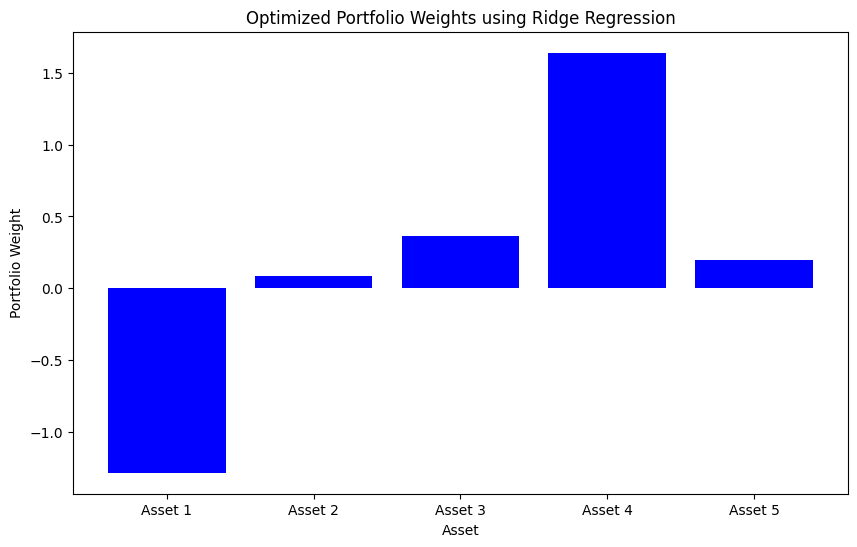

In [12]:
# Step 6: Visualize the Portfolio Weights
# ---------------------------------------------
plt.figure(figsize=(10, 6))
plt.bar(range(n_assets), portfolio_weights, color='blue')
plt.xlabel('Asset')
plt.ylabel('Portfolio Weight')
plt.title('Optimized Portfolio Weights using Ridge Regression')
plt.xticks(range(n_assets), [f'Asset {i+1}' for i in range(n_assets)])
plt.show()

# Application 2: Renewable Energy Prediction

In [19]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [26]:

# Step 1: Generate synthetic data for renewable energy prediction
# In a real-world scenario, this data would come from actual measurements of weather conditions, turbine characteristics, etc.

#We create synthetic data to simulate the conditions affecting renewable energy output. Features like wind speed, air pressure, temperature, humidity, and turbine efficiency are generated with random values.
#The target variable, energy_output, is a linear combination of these features with some added noise to simulate real-world measurement variability.

# Number of samples
n_samples = 1000

# Features: wind speed, air pressure, temperature, humidity, and turbine efficiency
np.random.seed(42)  # For reproducibility
wind_speed = np.random.rand(n_samples) * 15  # Wind speed in m/s
air_pressure = np.random.rand(n_samples) * 20 + 980  # Air pressure in hPa
temperature = np.random.rand(n_samples) * 25 + 5  # Temperature in Celsius
humidity = np.random.rand(n_samples) * 100  # Humidity in %
turbine_efficiency = np.random.rand(n_samples) * 0.5 + 0.5  # Efficiency between 0.5 and 1.0

# Renewable energy output (target variable) in MW
# This is a simplified linear combination of the features with some noise added
energy_output = (0.3 * wind_speed + 0.2 * air_pressure + 0.1 * temperature +
                 0.05 * humidity + 0.35 * turbine_efficiency + np.random.randn(n_samples) * 0.5)

# Create a DataFrame
data = pd.DataFrame({
    'Wind Speed': wind_speed,
    'Air Pressure': air_pressure,
    'Temperature': temperature,
    'Humidity': humidity,
    'Turbine Efficiency': turbine_efficiency,
    'Energy Output': energy_output
})


In [21]:

# Step 2: Prepare the data for modeling
# Features (X) and target variable (y)
X = data.drop(columns='Energy Output')
y = data['Energy Output']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Step 3: Apply Ridge Regression
# Initialize the Ridge regression model with alpha (λ) parameter
ridge_reg = Ridge(alpha=1.0)

# Fit the model on the training data
ridge_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = ridge_reg.predict(X_test)


In [23]:
# Step 4: Evaluate the model
# Calculate Mean Squared Error (MSE) and R^2 Score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.2730339507783323
R^2 Score: 0.9471013232528479


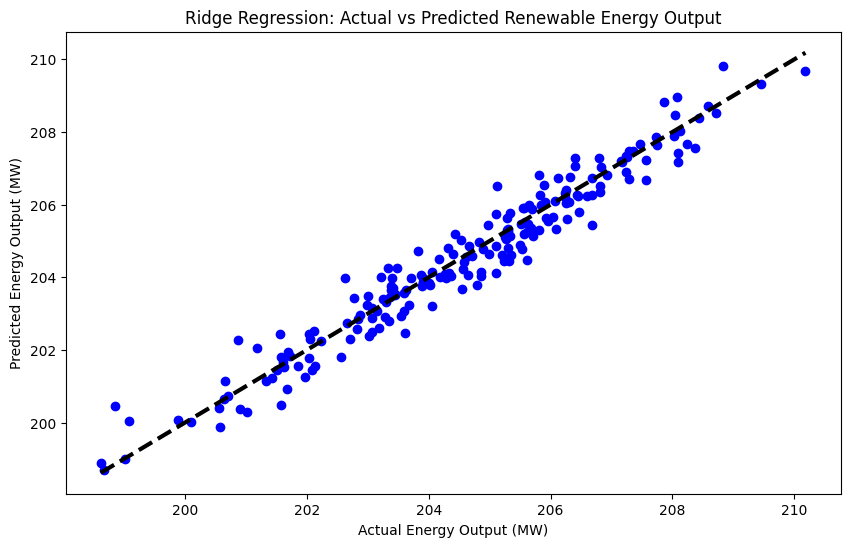

In [24]:
# Step 5: Visualize the Results
# Plot the actual vs predicted energy output
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual Energy Output (MW)')
plt.ylabel('Predicted Energy Output (MW)')
plt.title('Ridge Regression: Actual vs Predicted Renewable Energy Output')
plt.show()

In [25]:
# Step 6: Analyze the coefficients
# Ridge regression coefficients show the influence of each feature on the prediction
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_reg.coef_
})

print(coefficients)

              Feature  Coefficient
0          Wind Speed     0.301258
1        Air Pressure     0.201557
2         Temperature     0.097836
3            Humidity     0.049318
4  Turbine Efficiency     0.155459


In [27]:
# Predict with new input

# New input data
new_input = pd.DataFrame({
    'Wind Speed': [12.5],  # Example wind speed in m/s
    'Air Pressure': [995],  # Example air pressure in hPa
    'Temperature': [20],  # Example temperature in Celsius
    'Humidity': [75],  # Example humidity in %
    'Turbine Efficiency': [0.85]  # Example turbine efficiency
})

# Predict the energy output using the trained model
predicted_output = ridge_reg.predict(new_input)

print(f"Predicted Energy Output: {predicted_output[0]:.2f} MW")


Predicted Energy Output: 208.73 MW


In [28]:
# Calculate the accuracy

# Predict on the test set
y_test_pred = ridge_reg.predict(X_test)

# Calculate Mean Squared Error (MSE) and R^2 Score for the test set predictions
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test Set Mean Squared Error: {mse_test:.2f}")
print(f"Test Set R^2 Score: {r2_test:.2f}")


Test Set Mean Squared Error: 0.27
Test Set R^2 Score: 0.95
